In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

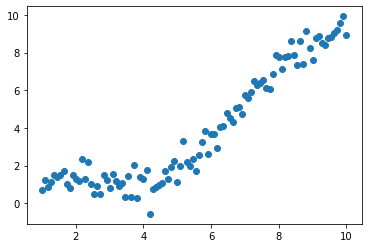

In [3]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

plt.scatter(data_x, data_y)

In [4]:
# fit a polynomial of order 6
def polynomial_X(X, degree):
    poly_X = np.ones(X.shape[0]).reshape(-1,1)
    
    for i in range(1,degree+1,1):
        poly_X = np.append(poly_X, X.reshape(-1,1)**i, axis =1)
    
    return poly_X

In [5]:
# Implement gradient computation and theta update 
def gradient_descent(X, y, itr, alpha):
    theta = np.zeros(X.shape[1])
    print(X.shape, theta.shape, y.shape)
    for k in range(itr):
        for i in range(X.shape[1]):
            theta[i] = theta[i] - alpha*2*sum((np.inner(X, theta) - y[:,0]) * X[:,i])/(X.shape[0])
    
    return theta

In [6]:
def Xy_normalization(X, y):
    return (X - X.min())/(X.max() - X.min()), (y - y.min())/(y.max() - y.min())

(80, 7) (7,) (80, 1)


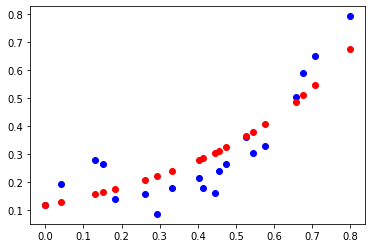

In [17]:
X_norm, y_norm = Xy_normalization(data_x.copy(), data_y.copy())

X_train, X_test, y_train, y_test = train_test_split(X_norm.copy(), y_norm.copy(), test_size = 0.2)

theta = gradient_descent(polynomial_X(X_train.copy(), 6), y_train.copy(), 1000, 0.01)

y_predict = polynomial_X(X_test, 6) @ theta

plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_predict, color = 'red')

In [15]:
# Call stochastic gradient descent in the main loop
def stochastic_gd(X, y, alpha):
    n = X.shape[0]
    sample_size = 10
    epochs = 1000
    theta = np.zeros(X.shape[1])

    for k in range(epochs): 
        idx = np.random.choice(n, sample_size, replace=False)
    
        X_sample = X[idx]
        y_sample = y[idx]
        
        for i in range(X.shape[1]):
            theta[i] = theta[i] - alpha*2*sum((np.inner(X_sample, theta) - y_sample[:,0]) * X_sample[:,i]) / X_sample.shape[0]
    
    return theta

theta = stochastic_gd(polynomial_X(X_train.copy(), 6), y_train.copy(), 0.01)

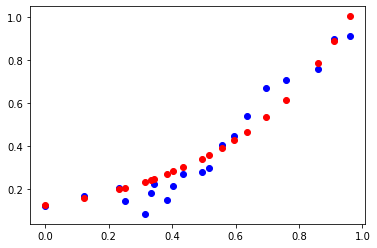

In [16]:
# predict y_hat using test_x and theta 
y_predict = polynomial_X(X_test, 6) @ theta

plt.scatter(X_test, y_test, color = 'blue')
plt.scatter(X_test, y_predict, color = 'red')